# Data Pre-processing for WA Modifiers

In [1]:
# Import 
import os
import pandas as pd
import fiona 
import geopandas as gpd

## Data import
Create a geopandas data frame dictionary with the keys as the layer name and value as the dataframe. This is done after setting the data path to the geodatabase folder. 

In [2]:
# Set Controls
gdf_dict = {}
gdf_error = []

# Change path
geo_path = "E:\\ABLE\\Modifiers\\Data\\Geodatabases\\"
os.chdir(geo_path) 

In [3]:
# get layers from .gdb file 
layers = fiona.listlayers("Project_ABLE_ESG_Feature_Service_Data.gdb")

# Create Dictionary (Takes 18 to 20 mins)
for i in range(len(layers)):
    print(i)
    gdf = gpd.read_file("Project_ABLE_ESG_Feature_Service_Data.gdb",layer=i)
    gdf_dict[layers[i]] = gdf

0
1
2
3
4


c:\Users\nmenon\AppData\Local\miniconda3\envs\srk\Lib\site-packages\geopandas\io\file.py:399: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  as_dt = pd.to_datetime(df[k], errors="ignore")
c:\Users\nmenon\AppData\Local\miniconda3\envs\srk\Lib\site-packages\geopandas\io\file.py:403: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  as_dt = pd.to_datetime(df[k], errors="ignore", utc=True)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


In [4]:
layers

['L49WRIMS___Groundwater_Resources__DWER_084_',
 'L7Hydrography_Linear__Hierarchy___DWER_031_',
 'L0WA_Main_Roads___State_Roads',
 'L17CAPAD_NatureReserve',
 'L3SECTION19',
 'L1Overview_Towns__LGATE_054_',
 'L10WA_GA_Railway_Stations',
 'L46WRIMS___Surface_Water_Resources__DWER_081_',
 'L9CAPAD_51gReserve',
 'L13Northern_Mineral_Railways',
 'L7Electricity_Transmission_Lines',
 'L11Southern_Public_Railways',
 'L5Contaminated_Sites_Database__DWER_059_',
 'L0WA_Sensitive_Infrastructure',
 'L8National_Major_Ports',
 'L15DBCA___Legislated_Lands_and_Waters__DBCA_011_',
 'L9Gas_Pipelines',
 'L2WA_SWIS_Electrical_Pillars_WP_041',
 'L28RIWI_Act__Groundwater_Areas__DWER_034_',
 'L10WA_SWIS_Substations_and_Power_Terminals',
 'L1Distribution_Overhead_Powerlines_WP_031',
 'L8Major_Power_Stations',
 'L6GA_Electricity_Transmission_Lines',
 'L5RNTBC_Nat',
 'L1Pastoral_Stations_DPLH_083',
 'L0UNESCO_Biosphere_Reserves',
 'L3Aboriginal_Heritage_Places__DPLH_001_',
 'L11CAPAD_BotanicGardens',
 'L12FADA_N

<Axes: >

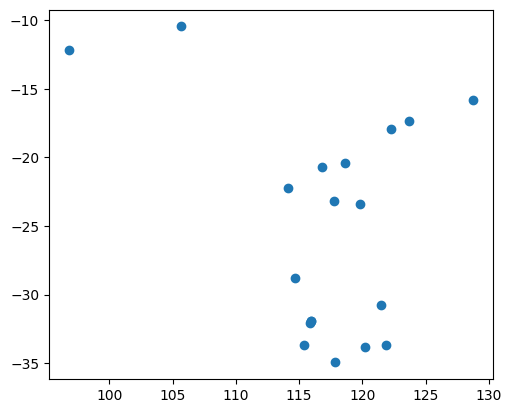

In [6]:
tt.plot()

## Processing and saving the outputs as shapefile
There are 2 main pre-processing steps in this section:
1. Convert the CRS of every gdf to that of the grid projection (Currently all layers in the database is different)
2. Save the file as a shape file after clearing all the errors in the saved data index and column names (Some of the current feature column names are incompatible with ESRI Shapefile drivers)

The CRS of the grid file is Projection: GDA2020 MGA Zone 50. 
(This projection it represents the specific UTM zone for the area of Westen Australia).

In [6]:
# Change path
grid_path = "E:\\ABLE\\Modifiers\\Grid_WA\\Base Grid\\"
os.chdir(grid_path) 

In [7]:
# Import grid_5km and get CRS 
grid_5km = gpd.read_file("WA_Grid_5km_point.shp")
CRS = grid_5km.crs

The below cell runs and saves the layers using a method called exception handing. It tries to save the layer as an ESRI shapefile and if the line throws a driver error due to saving (which is most expected in this case) it creates an exception for that particular layer and then saves the name of that layer into the `gdf_error` list. This helps processing easier as all files needn't be looked at individually, saving alot of time. 

In [9]:
for i in range(len(layers)):
    try:
        gdf = gdf_dict[layers[i]].to_crs(crs = CRS)
        shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
        save_path = os.path.join(shape_path, layers[i])
        os.mkdir(save_path)
        gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
    except (fiona.errors.DriverSupportError, Exception) as e:
        print(e)
        gdf_error.append(layers[i])

C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel

ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel

ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel

ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel

ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel

ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


GDAL Error: Coordinates with non-finite values are not allowed. Failed to write record: <fiona.model.Feature object at 0x00000216167675D0>
ESRI Shapefile does not support datetime fields
ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


GDAL Error: Coordinates with non-finite values are not allowed. Failed to write record: <fiona.model.Feature object at 0x000002161FD8AE90>


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


GDAL Error: Coordinates with non-finite values are not allowed. Failed to write record: <fiona.model.Feature object at 0x000002161AB64FD0>


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


ESRI Shapefile does not support datetime fields
GDAL Error: Coordinates with non-finite values are not allowed. Failed to write record: <fiona.model.Feature object at 0x00000216156A4390>


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')
C:\Users\nmenon\AppData\Local\Temp\ipykernel

ESRI Shapefile does not support datetime fields


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\4047933228.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"{save_path}/{layers[i]}.shp", driver='ESRI Shapefile')


In [46]:
pth = os.path.join(shape_path, "L0WA_Main_Roads___State_Roads")
ss = gpd.read_file(f"{pth}/L0WA_Main_Roads___State_Roads.shp")

## Sub Pre-processing 

Specific sub processing codes for each layer are hidden. Double click on the comment to unhide the code. 

In [22]:
edit = pd.DataFrame({"layer" : gdf_error})
edit.to_csv("E:\\ABLE\\Modifiers\\Data\\gdf_error.csv")

In [551]:
# layer
gdf_layer = gdf_error[46]
gdf_layer

'L14WA_Major_Aviation_Terminals_Points'

In [71]:
## L17CAPAD_NatureReserve - 0
#############################################################################

# # layer
# gdf_layer = gdf_error[0]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [42]:
# # L3SECTION19 - 1
# ############################################################################

# # layer 
# gdf_layer = gdf_error[1]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["STARTDATE", "ENDDATE", "EXTRACT_DA"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [70]:
# # L10WA_GA_Railway_Stations - 2
# ############################################################################

# # layer 
# gdf_layer = gdf_error[2]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["FEATURE_DATE", "ATTRIBUTE_DATE", "LOADING_DATE", "SOURCE_SUPPLY_DATE"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [60]:
# # L9CAPAD_51gReserve - 3
# ############################################################################

# # layer 
# gdf_layer = gdf_error[3]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [72]:
# # L13Northern_Mineral_Railways - 4
# ############################################################################

# # layer 
# gdf_layer = gdf_error[4]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["FEATURE_DATE", "ATTRIBUTE_DATE", "LOADING_DATE", "SOURCE_SUPPLY_DATE"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [85]:
# # L7Electricity_Transmission_Lines - 5
# ############################################################################

# # layer 
# gdf_layer = gdf_error[5]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["REVISED"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [90]:
# # L11Southern_Public_Railways - 6
# ############################################################################

# # layer 
# gdf_layer = gdf_error[6]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["FEATURE_DATE", "ATTRIBUTE_DATE", "LOADING_DATE", "SOURCE_SUPPLY_DATE"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [ ]:
# # L5Contaminated_Sites_Database__DWER_059_ - 7
# ############################################################################

# # layer 
# gdf_layer = gdf_error[7]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["classification_date"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [125]:
# # L9Gas_Pipelines - 8
# ############################################################################

# # layer 
# gdf_layer = gdf_error[8]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["ISSUED", "EXPIRY", "EXTRACT_DATE"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [137]:
# # L28RIWI_Act__Groundwater_Areas__DWER_034_ - 9
# ############################################################################

# # layer 
# gdf_layer = gdf_error[9]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["crt_date", "srce_date", "ret_date", "gaz_date"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [145]:
# # L6GA_Electricity_Transmission_Lines - 10
# ############################################################################

# # layer 
# gdf_layer = gdf_error[10]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["REVISED"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [164]:
# # L5RNTBC_Nat - 11
# ############################################################################

# # layer 
# gdf_layer = gdf_error[11]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Status", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [177]:
# # L3Aboriginal_Heritage_Places__DPLH_001_ - 12
# ############################################################################

# # layer 
# gdf_layer = gdf_error[12]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["boundary_last_update_date", "protected_area_gazetted_date"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [206]:
# # L11CAPAD_BotanicGardens - 13
# ############################################################################

# # layer 
# gdf_layer = gdf_error[13]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [205]:
# # L12FADA_Nat - 14
# ############################################################################

# # layer 
# gdf_layer = gdf_error[14]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["s29_Notif_Date", "Date_Lodged", "End_Negotiation_Date", "StatusDate", "Outcome_Date", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [216]:
# # L0SEC57_4 - 15
# ############################################################################

# # layer 
# gdf_layer = gdf_error[15]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["STARTDATE", "ENDDATE", "EXTRACT_DATE"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [225]:
# # L2Aboriginal_Communities_and_Town_Reserves__DPLH_002_ - 16
# ############################################################################

# # layer 
# gdf_layer = gdf_error[16]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["population_source_date", "last_reviewed_date", "last_reviewed_human_services"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [239]:
# # L3Native_Title_Nat - 17
# ############################################################################

# # layer 
# gdf_layer = gdf_error[17]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Determination_Date", "NNTR_Registration_Date", "Date_extracted", "Date_Currency"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [246]:
# # L16Bush_Fire_Prone_Areas_2021__OBRM_019_ - 18
# ############################################################################

# # layer 
# gdf_layer = gdf_error[18]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["designationdate"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [248]:
# # L4s31_Agreements_Nat - 19
# ############################################################################

# # layer 
# gdf_layer = gdf_error[19]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Date_Received", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [262]:
# # L6RATSIB_Nat - 20
# ############################################################################

# # layer 
# gdf_layer = gdf_error[20]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [270]:
# # L16CAPAD_NationalPark - 21
# ############################################################################

# # layer 
# gdf_layer = gdf_error[21]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [280]:
# # L7NTDA_Schedule_Nat - 22
# ############################################################################

# # layer 
# gdf_layer = gdf_error[22]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Date_Lodged", "Date_Status_Effective", "Date_RT_Decision", 
#                  "Date_CurrentReg", "Date_NTRI", "Date_Notn_Close", "Date_Last_FC_Order", 
#                  "Date_Currency", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [290]:
# # L30RIWI_Act__Surface_Water_Areas_and_Irrigation_Districts__DWER_037_ - 23
# ############################################################################

# # layer 
# gdf_layer = gdf_error[23]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["gaz_date"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [296]:
# # L8NTDA_Register_Nat - 24
# ############################################################################

# # layer 
# gdf_layer = gdf_error[24]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Date_Lodged", "Date_Status_Effective", "Date_RT_Decision", "Date_CurrentReg", 
#                   "Date_NTRI", "Date_Notn_Close", "Date_Last_FC_Order", "Date_Currency", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [304]:
# # L9NTD_Register_Nat - 25
# ############################################################################

# # layer 
# gdf_layer = gdf_error[25]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Determination_Date", "NNTR_Registration_Date", "Date_Currency", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [346]:
# # L10NTDA_Transaction_Nat - 26
# ############################################################################

# # layer 
# gdf_layer = gdf_error[26]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Date_Lodged", "Date_Currency", "Start_Date", "End_Date", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [363]:
# # L11ILUA_Nat_Reg_Notified - 27
# ############################################################################

# # layer 
# gdf_layer = gdf_error[27]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Date_Lodged", "Date_Notified", "Date_Notn_Close", "Date_Registered", 
#                  "Timeframe_Start_Date", "Timeframe_End_Date", "Date_Currency", "Date_extracted", "Date_Assistance"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [372]:
# # L13FA_Objections_Nat - 28
# ############################################################################

# # layer 
# gdf_layer = gdf_error[28]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["s29_Notif_Date", "Date_Lodged", "End_Negotiation_Date", 
#                   "StatusDate", "Outcome_Date", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [408]:
# # L14FA_Notices_Nat - 29
# ############################################################################

# # layer 
# gdf_layer = gdf_error[29]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["Ntfcn_Date", "Mth2_Close", "Mth3_Close", "Mth4_Close", 
#                   "Status_Date", "AsAt", "Date_Currency", "Date_extracted"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [409]:
# # L0WA_DMIRS_Mineralisation_Zone - 30
# ############################################################################

# # layer 
# gdf_layer = gdf_error[30]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["STARTDATE", "ENDDATE", "EXTRACT_DATE"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [545]:
# # L10CAPAD_51hReserve - 31
# ############################################################################

# # layer 
# gdf_layer = gdf_error[31]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [433]:
# # L12CAPAD_ConservationCovenant - 32
# ############################################################################

# # layer 
# gdf_layer = gdf_error[32]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [544]:
# # L13CAPAD_ConservationPark - 33
# ############################################################################

# # layer 
# gdf_layer = gdf_error[33]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [543]:
# # L14CAPAD_ConservationReserve - 34
# ############################################################################

# # layer 
# gdf_layer = gdf_error[34]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [542]:
# # L15CAPAD_ManagementArea - 35
# ############################################################################

# # layer 
# gdf_layer = gdf_error[35]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [541]:
# # L18CAPAD_NRS_Addition_GazettalinProgress - 36
# ############################################################################

# # layer 
# gdf_layer = gdf_error[36]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [540]:
# # L19CAPAD_Other - 37
# ############################################################################

# # layer 
# gdf_layer = gdf_error[37]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [539]:
# # L2IUCN_World_Database_of_Protected_Areas___Dec22 - 38
# ############################################################################

# # layer 
# gdf_layer = gdf_error[38]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [500]:
# # L20CAPAD_PrivateNatureReserve - 39
# ############################################################################

# # layer 
# gdf_layer = gdf_error[39]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [538]:
# # L21CAPAD_StateReserve - 40
# ############################################################################

# # layer 
# gdf_layer = gdf_error[40]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [ ]:
# # L21Threatened_and_Priority_Flora__DBCA_036_ - 41
# ############################################################################

# # layer 
# gdf_layer = gdf_error[41]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [ ]:
# # L1WDPA_poly_latest - 42
# ############################################################################

# # layer 
# gdf_layer = gdf_error[42]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [547]:
# # L2Listed_migratory_species - 43
# ############################################################################

# # layer 
# gdf_layer = gdf_error[43]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["EXTRACTED"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [ ]:
# # L3Listed_threatened_species - 44
# ############################################################################

# # layer 
# gdf_layer = gdf_error[44]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["EXTRACTED"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [ ]:
# # L0World_Heritage_Sites - 45
# ############################################################################

# # layer 
# gdf_layer = gdf_error[45]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp = temp.drop(["GAZ_DATE", "LATEST_GAZ"], axis=1)

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [ ]:
# # L14WA_Major_Aviation_Terminals_Points - 46
# ############################################################################

# # layer 
# gdf_layer = gdf_error[46]

# # file with error 
# temp = gdf_dict[gdf_layer]
# temp = temp.to_crs(crs = CRS)
# print(temp.columns)

# # Clean data
# temp = temp.drop(["REVISED"], axis=1))

# # Save cleaned data
# shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
# save_path = os.path.join(shape_path, gdf_layer)
# temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')

# # Load again and check
# aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")

In [552]:
temp = gdf_dict[gdf_layer]
temp = temp.to_crs(crs = CRS)
temp.head(3)

,FEATURETYPE,DESCRIPTION,CLASS,Project_Able_DBO_MajorAviationTerminals_FID,NAME,STRUCTURETYPE,AIRPORTCODE,ADDRESS,SUBURB,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,GlobalID,geometry
0,Terminal,A building located at an airport that serves a...,Domestic,19,Jandakot,None,JAD,None,Jandakot,Western Australia,3,2012-09-19 00:00:00+00:00,None,{1C83DFF1-5DE4-4219-A345-23352366BB2F},POINT (393692.337 6448151.152)
1,Terminal,A building located at an airport that serves a...,International,20,Perth - Terminal 1,None,PER,None,Perth Airport,Western Australia,5,2012-09-19 00:00:00+00:00,None,{A959BFFB-B506-401C-8396-B4531F6B3BB0},POINT (403037.208 6465668.261)
2,Terminal,A building located at an airport that serves a...,Domestic,21,Perth - Terminals 2 and 3,None,PER,None,Perth Airport,Western Australia,5,2012-09-19 00:00:00+00:00,None,{ECBCA8E4-CC83-49F8-8483-427DBBC444CE},POINT (401768.904 6466463.669)


In [553]:
temp.columns

Index(['FEATURETYPE', 'DESCRIPTION', 'CLASS',
       'Project_Able_DBO_MajorAviationTerminals_FID', 'NAME', 'STRUCTURETYPE',
       'AIRPORTCODE', 'ADDRESS', 'SUBURB', 'STATE', 'SPATIALCONFIDENCE',
       'REVISED', 'COMMENT', 'GlobalID', 'geometry'],
      dtype='object')

In [554]:
temp = temp.drop(["REVISED"], axis=1)

In [555]:
# Save cleaned data
shape_path = "E:\\ABLE\\Modifiers\\Data\\Shapefiles\\"
save_path = os.path.join(shape_path, gdf_layer)
temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')


C:\Users\nmenon\AppData\Local\Temp\ipykernel_11120\3902346836.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  temp.to_file(f"{save_path}/{gdf_layer}.shp", driver='ESRI Shapefile')


In [556]:
aa = gpd.read_file(f"{save_path}/{gdf_layer}.shp")
aa.head(3)

,FEATURETYP,DESCRIPTIO,CLASS,Project_Ab,NAME,STRUCTURET,AIRPORTCOD,ADDRESS,SUBURB,STATE,SPATIALCON,COMMENT,GlobalID,geometry
0,Terminal,A building located at an airport that serves a...,Domestic,19,Jandakot,None,JAD,None,Jandakot,Western Australia,3,None,{1C83DFF1-5DE4-4219-A345-23352366BB2F},POINT (393692.337 6448151.152)
1,Terminal,A building located at an airport that serves a...,International,20,Perth - Terminal 1,None,PER,None,Perth Airport,Western Australia,5,None,{A959BFFB-B506-401C-8396-B4531F6B3BB0},POINT (403037.208 6465668.261)
2,Terminal,A building located at an airport that serves a...,Domestic,21,Perth - Terminals 2 and 3,None,PER,None,Perth Airport,Western Australia,5,None,{ECBCA8E4-CC83-49F8-8483-427DBBC444CE},POINT (401768.904 6466463.669)


<Axes: >

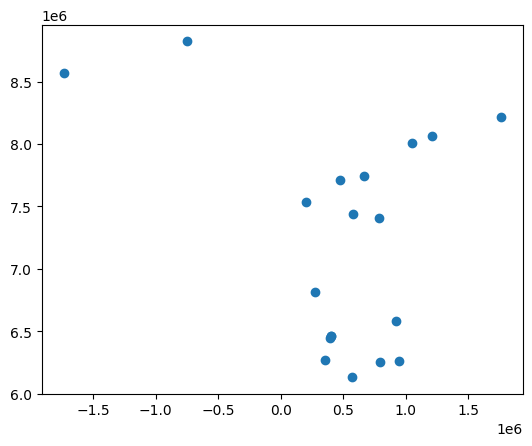

In [557]:
aa.plot()

## References

1. https://gis.stackexchange.com/questions/32762/accessing-feature-classes-in-file-geodatabases-using-python-and-gdal
2. https://stackoverflow.com/questions/70010488/how-do-i-create-a-shapefile-from-a-geopandas-dataframe 
3. https://geopandas.org/en/stable/index.html 